# Task 1 - EDA on Retail Sales Data

Name:-Ranjit Debnath

Domain:-Data Analytics

Oasis Infobyte Virtual Internship program

IMPORTING IMPORTANT LIBRARIES

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading the Dataset

In [34]:
df=pd.read_csv('retail_sales_dataset.csv') #Top Five rows
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [35]:
df.shape

(1000, 9)

In [36]:
df.size

9000

In [37]:
df.columns #Shows the name of all the columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

In [38]:
df.info() #Shows the number of Non NULL Values and data types of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


# Descriptive Analysis

In [39]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [40]:
print("Total Quantity of product Sold:",df['Quantity'].sum())
print('Total Amount of revenue generated:',df['Total Amount'].sum())

Total Quantity of product Sold: 2514
Total Amount of revenue generated: 456000


Check for NULL Values

In [41]:
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [42]:
print('Total number of duplicate values in the dataset is:',df.duplicated().sum())

Total number of duplicate values in the dataset is: 0


# Lets Visualise the Dataset Graphically

In [43]:
df['Product Category'].unique()

array(['Beauty', 'Clothing', 'Electronics'], dtype=object)

In [44]:
df['Product Category'].value_counts() #Prints the count of every unique value

Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64

Text(0.5, 1.0, 'Count Plot')

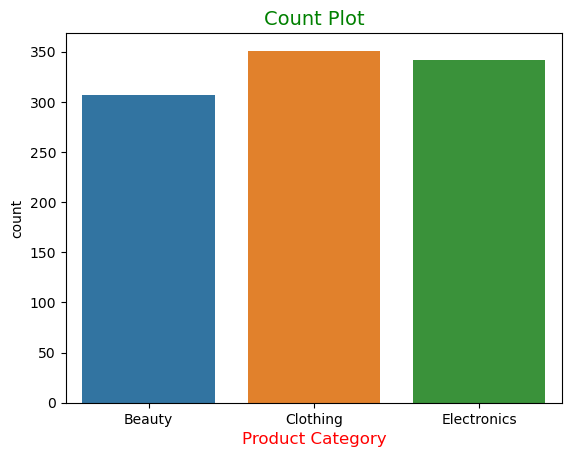

In [45]:
sns.countplot(x=df['Product Category'])
plt.xlabel('Product Category',color='r',size=12)
plt.title('Count Plot',color='g',size=14)

In [46]:
df.groupby('Product Category')[['Quantity','Total Amount']].sum()

,Quantity,Total Amount
Product Category,,
Beauty,771,143515
Clothing,894,155580
Electronics,849,156905


In [47]:
result1=df.groupby('Product Category')['Quantity'].sum()
result1

Product Category
Beauty         771
Clothing       894
Electronics    849
Name: Quantity, dtype: int64

Text(0.5, 1.0, 'Quantity VS Product category')

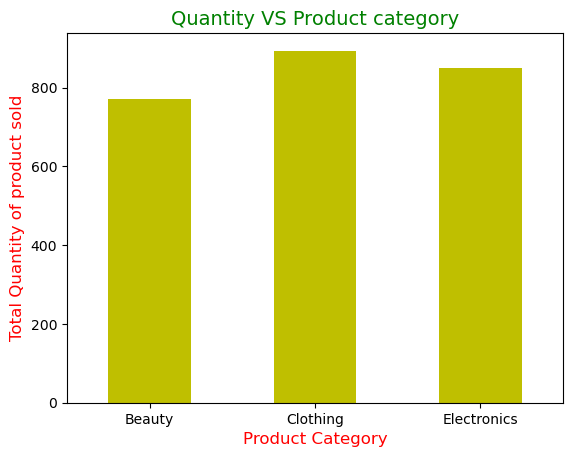

In [48]:
result1.plot(kind='bar',color='y')
plt.xlabel('Product Category',color='r',size=12)
plt.xticks(rotation=0)
plt.ylabel('Total Quantity of product sold',color='r',size=12)
plt.title('Quantity VS Product category',color='g',size=14)

1.Maximum Product sold is Clothing items                                                                                      


2.Minimum product sold is Beauty items

In [49]:
result2=df.groupby('Product Category')['Total Amount'].sum()
result2

Product Category
Beauty         143515
Clothing       155580
Electronics    156905
Name: Total Amount, dtype: int64

Text(0.5, 1.0, 'Total Amount VS Product category')

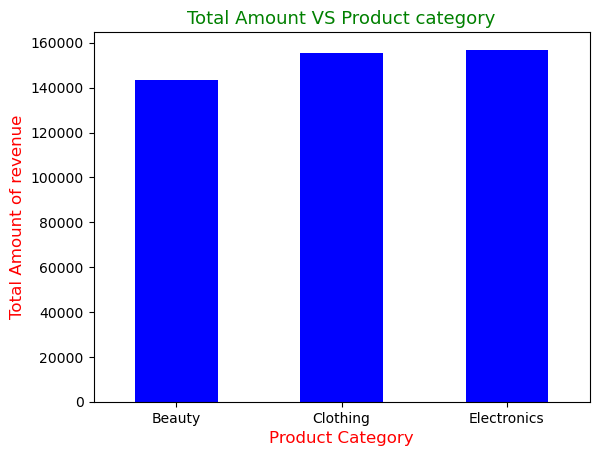

In [50]:
result2.plot(kind='bar',color='b')
plt.xlabel('Product Category',color='r',size=12)
plt.xticks(rotation=0)
plt.ylabel('Total Amount of revenue',color='r',size=12)
plt.title('Total Amount VS Product category',color='g',size=13)

1.Maximum Amount is obtained from Clothing products

2.Minimum Amount is obtained from Beauty product

# Pie Plot

In [51]:
slices=df.groupby('Product Category')['Quantity'].sum()
print(slices)
categories=['Beauty','Clothing','Electronics']

Product Category
Beauty         771
Clothing       894
Electronics    849
Name: Quantity, dtype: int64


Text(0.5, 1.0, 'Product category')

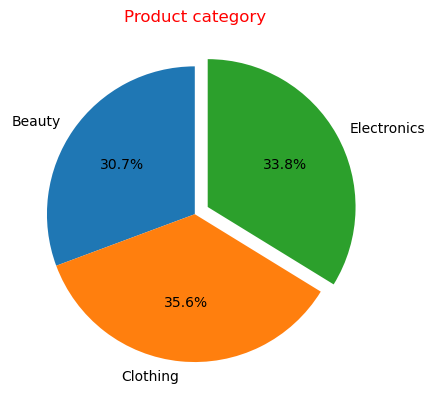

In [52]:
plt.pie(slices,startangle=90,explode=(0,0,0.1),labels=categories,autopct='%1.1f%%')
plt.title('Product category',color='r')
#autopct represent the percentage and 1.1 represent after integer only one decimal should print

1.Maximum Product sold is Clothing items

2.Minimum product sold is Beauty items

In [53]:
gen=df['Gender'].value_counts()
gen

Gender
Female    510
Male      490
Name: count, dtype: int64

Text(0.5, 1.0, 'Gender')

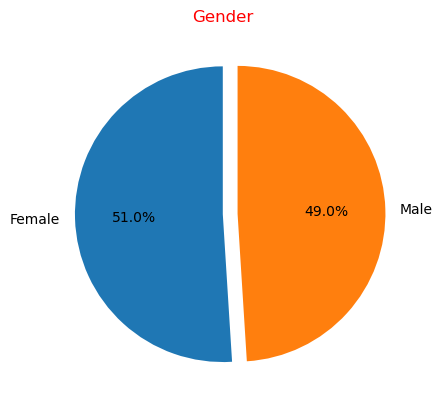

In [54]:
plt.pie(gen,labels=['Female','Male'],explode=(0,0.1),startangle=90,autopct='%1.1f%%')
plt.title('Gender',color='r')

# THE END